<a href="https://colab.research.google.com/github/Amrutha369/voice-spoofing-detection/blob/main/wavenet_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocessing

In [ ]:
import os
import librosa
import numpy as np

def preprocess_audio(input_audio, target_sr=16000, max_length_sec=3):
    # Resample if necessary
    if input_audio.shape[0] != target_sr * max_length_sec:
        input_audio = librosa.resample(input_audio, orig_sr=len(input_audio), target_sr=target_sr)

    # Truncate or pad to maximum length
    max_length_samples = target_sr * max_length_sec
    if len(input_audio) > max_length_samples:
        input_audio = input_audio[:max_length_samples]
    elif len(input_audio) < max_length_samples:
        input_audio = np.pad(input_audio, (0, max_length_samples - len(input_audio)), mode='constant')

    # Check input audio shape
    if input_audio.ndim == 1:
        # Add channel dimension if it's a single-channel audio
        input_audio = np.expand_dims(input_audio, axis=-1)
        # Expand the channel dimension to 4
        input_audio = np.repeat(input_audio, repeats=4, axis=-1)

    return input_audio

def preprocess_audio_folder(input_folder, output_folder, target_sr=16000, max_length_sec=3):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Process each audio file in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith('.flac'):
            # Load and preprocess audio
            input_path = os.path.join(input_folder, filename)
            input_audio, sr = librosa.load(input_path, sr=None)
            processed_audio = preprocess_audio(input_audio, target_sr, max_length_sec)

            # Save preprocessed audio to output folder
            output_path = os.path.join(output_folder, filename.replace('.flac', '.npy'))
            np.save(output_path, processed_audio)

            print(f"Processed {filename} and saved to {output_path}")



# Example usage
input_folder = "/content/my_drive/MyDrive/dataset/LA/ASVspoof2019_LA_train/flac"
output_folder = "/content/my_drive/MyDrive/wave_dataset/train"
preprocess_audio_folder(input_folder, output_folder)


In [ ]:
import os
import librosa
import numpy as np

def preprocess_audio(input_audio, target_sr=16000, max_length_sec=3):
    # Resample if necessary
    if input_audio.shape[0] != target_sr * max_length_sec:
        input_audio = librosa.resample(input_audio, orig_sr=len(input_audio), target_sr=target_sr)

    # Truncate or pad to maximum length
    max_length_samples = target_sr * max_length_sec
    if len(input_audio) > max_length_samples:
        input_audio = input_audio[:max_length_samples]
    elif len(input_audio) < max_length_samples:
        input_audio = np.pad(input_audio, (0, max_length_samples - len(input_audio)), mode='constant')

    # Check input audio shape
    if input_audio.ndim == 1:
        # Add channel dimension if it's a single-channel audio
        input_audio = np.expand_dims(input_audio, axis=-1)
        # Expand the channel dimension to 4
        input_audio = np.repeat(input_audio, repeats=4, axis=-1)

    return input_audio

def preprocess_audio_folder(input_folder, output_folder, target_sr=16000, max_length_sec=3):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Process each audio file in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith('.flac'):
            # Load and preprocess audio
            input_path = os.path.join(input_folder, filename)
            input_audio, sr = librosa.load(input_path, sr=None)
            processed_audio = preprocess_audio(input_audio, target_sr, max_length_sec)

            # Save preprocessed audio to output folder
            output_path = os.path.join(output_folder, filename.replace('.flac', '.npy'))
            np.save(output_path, processed_audio)

            print(f"Processed {filename} and saved to {output_path}")



input_folder = "/content/my_drive/MyDrive/dataset/LA/ASVspoof2019_LA_eval/flac"
output_folder = "/content/my_drive/MyDrive/wave_dataset/test"
preprocess_audio_folder(input_folder, output_folder)


In [ ]:
import os
import librosa
import numpy as np

def preprocess_audio(input_audio, target_sr=16000, max_length_sec=3):
    # Resample if necessary
    if input_audio.shape[0] != target_sr * max_length_sec:
        input_audio = librosa.resample(input_audio, orig_sr=len(input_audio), target_sr=target_sr)

    # Truncate or pad to maximum length
    max_length_samples = target_sr * max_length_sec
    if len(input_audio) > max_length_samples:
        input_audio = input_audio[:max_length_samples]
    elif len(input_audio) < max_length_samples:
        input_audio = np.pad(input_audio, (0, max_length_samples - len(input_audio)), mode='constant')

    # Check input audio shape
    if input_audio.ndim == 1:
        # Add channel dimension if it's a single-channel audio
        input_audio = np.expand_dims(input_audio, axis=-1)
        # Expand the channel dimension to 4
        input_audio = np.repeat(input_audio, repeats=4, axis=-1)

    return input_audio

def preprocess_audio_folder(input_folder, output_folder, target_sr=16000, max_length_sec=3):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Process each audio file in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith('.flac'):
            # Load and preprocess audio
            input_path = os.path.join(input_folder, filename)
            input_audio, sr = librosa.load(input_path, sr=None)
            processed_audio = preprocess_audio(input_audio, target_sr, max_length_sec)

            # Save preprocessed audio to output folder
            output_path = os.path.join(output_folder, filename.replace('.flac', '.npy'))
            np.save(output_path, processed_audio)

            print(f"Processed {filename} and saved to {output_path}")



input_folder = "/content/my_drive/MyDrive/dataset/LA/ASVspoof2019_LA_dev/flac"
output_folder = "/content/my_drive/MyDrive/wave_dataset/val"
preprocess_audio_folder(input_folder, output_folder)


# Split

In [ ]:
import os
import numpy as np

# Load preprocessed audio data
def load_audio_data(folder):
    audio_data = []
    for filename in os.listdir(folder):
        if filename.endswith('.npy'):
            audio_path = os.path.join(folder, filename)
            audio = np.load(audio_path)
            audio_data.append(audio)
    return np.array(audio_data)

# Load labels from text file
def load_labels(file_path):
    with open(file_path, 'r') as file:
        labels = [line.strip() for line in file]
    return labels

# Define paths
train_folder = "/content/drive/MyDrive/wave_dataset/train"
val_folder = "/content/drive/MyDrive/wave_dataset/val"
test_folder = "/content/drive/MyDrive/wave_dataset/test"


# Load audio data and labels for train, val, test
x_train = load_audio_data(train_folder)
x_val = load_audio_data(val_folder)
x_test = load_audio_data(test_folder)

y_train = load_labels(os.path.join(train_folder, 'train_lab.txt'))
y_val = load_labels(os.path.join(val_folder, 'val_lab.txt'))
y_test = load_labels(os.path.join(test_folder, 'test_lab.txt'))

print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)
print("x_test shape:", x_test.shape)
print("y_train length:", len(y_train))
print("y_val length:", len(y_val))
print("y_test length:", len(y_test))


x_train shape: (700, 48000, 4)
x_val shape: (152, 48000, 4)
x_test shape: (152, 48000, 4)
y_train length: 700
y_val length: 152
y_test length: 152


In [ ]:
# Convert string data to float data
x_train = x_train.astype(float)
x_val = x_val.astype(float)
x_test = x_test.astype(float)
y_train = np.array(y_train)
y_train_np = y_train.astype(float)
y_val_np = np.array(y_val)
y_val_np = y_val_np.astype(float)
import numpy as np

# Convert y_test list to numpy array
y_test = np.array(y_test)
# Now you can use the astype method to convert the data type
y_test = y_test.astype(float)

y_test = y_test.astype(float)

In [ ]:
print("y_train length:", len(y_train_np))
print("y_val length:", len(y_val_np))
print("y_test length:", len(y_test))

y_train length: 700
y_val length: 152
y_test length: 152


# WaveNet Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, Activation, Add, BatchNormalization, GlobalAveragePooling1D, Dense
from tensorflow.keras.models import Model

def wavenet_residual_block(x, dilation_rate, filters, kernel_size):
    # Dilated causal convolution
    conv = Conv1D(filters=filters, kernel_size=kernel_size, padding='causal', dilation_rate=dilation_rate)(x)
    conv_tanh = Activation('tanh')(conv)
    conv_sigmoid = Activation('sigmoid')(conv)
    gated = tf.multiply(conv_tanh, conv_sigmoid)

    # Batch Normalization
    gated = BatchNormalization()(gated)

    # 1x1 convolution for residual connection
    skip = Conv1D(filters=filters, kernel_size=1)(gated)

    # Skip and residual connections
    residual = Add()([skip, x])
    return residual, skip

def build_wavenet(input_shape, num_blocks, dilation_depth, num_filters, kernel_size, num_classes):
    input_layer = tf.keras.layers.Input(shape=input_shape)
    x = input_layer

    # Initial causal convolution
    x = Conv1D(filters=num_filters, kernel_size=kernel_size, padding='causal')(x)

    # WaveNet residual blocks
    skips = []
    for _ in range(num_blocks):
        for dilation_rate in [2 ** i for i in range(dilation_depth)]:
            x, skip = wavenet_residual_block(x, dilation_rate, num_filters, kernel_size)
            skips.append(skip)

    # Sum all skip connections
    x = Add()(skips)
    x = Activation('relu')(x)

    # 1x1 convolution for output
    x = Conv1D(filters=num_filters, kernel_size=1)(x)
    x = Activation('relu')(x)

    # Global average pooling
    x = GlobalAveragePooling1D()(x)

    # Output layer
    output_layer = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Define model parameters
input_shape = (48000, 4)
kernel_size = 3
num_classes = 4
num_blocks = 6
dilation_depth = 5
num_filters = 32



In [ ]:
from tensorflow.keras.optimizers import Adam

# Define the learning rate and batch size
learning_rate = 0.0001  # Adjust this value as needed
batch_size = 8  # Adjust this value as needed

# Build and compile the WaveNet model with the specified learning rate
model = build_wavenet(input_shape, num_blocks, dilation_depth, num_filters, kernel_size, num_classes)

# Compile the model
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary




In [ ]:
# Train the model
history = model.fit(x_train, y_train_np, epochs=50, batch_size=batch_size, validation_data=(x_val, y_val_np))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Epoch 1/50
88/88 [==============================] - 119s 922ms/step - loss: 1.4073 - accuracy: 0.2814 - val_loss: 1.9431 - val_accuracy: 0.2434
Epoch 2/50
88/88 [==============================] - 81s 916ms/step - loss: 1.3376 - accuracy: 0.3329 - val_loss: 1.9343 - val_accuracy: 0.2434
Epoch 3/50
88/88 [==============================] - 81s 916ms/step - loss: 1.2893 - accuracy: 0.3814 - val_loss: 3.2652 - val_accuracy: 0.2434
Epoch 4/50
88/88 [==============================] - 81s 918ms/step - loss: 1.2651 - accuracy: 0.3871 - val_loss: 4.8045 - val_accuracy: 0.2500
Epoch 5/50
88/88 [==============================] - 81s 916ms/step - loss: 1.2320 - accuracy: 0.4243 - val_loss: 5.4521 - val_accuracy: 0.2434
Epoch 6/50
88/88 [==============================] - 81s 918ms/step - loss: 1.2139 - accuracy: 0.4371 - val_loss: 3.8377 - val_accuracy: 0.2434
Epoch 7/50
88/88 [==============================] - 81s 916ms/step - loss: 1.1924 - accuracy: 0.4329 - val_loss: 3.0455 - val_accuracy: 0.243

In [ ]:
model.save('/content/drive/MyDrive/save/voice-spoofing-detection-using-wavenet-Multiclass.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import os
import librosa
import numpy as np
from tensorflow.keras.models import load_model

# Define the model file path
model_path = "/content/drive/MyDrive/save/voice-spoofing-detection-using-wavenet-Multiclass.h5"  # Replace with the actual path to your model file

# Load the trained WaveNet model
model = load_model(model_path)

def preprocess_audio(input_audio, target_sr=16000, max_length_sec=3):
    # Resample if necessary
    if input_audio.shape[0] != target_sr * max_length_sec:
        input_audio = librosa.resample(input_audio, orig_sr=len(input_audio), target_sr=target_sr)

    # Truncate or pad to maximum length
    max_length_samples = target_sr * max_length_sec
    if len(input_audio) > max_length_samples:
        input_audio = input_audio[:max_length_samples]
    elif len(input_audio) < max_length_samples:
        input_audio = np.pad(input_audio, (0, max_length_samples - len(input_audio)), mode='constant')

    # Check input audio shape
    if input_audio.ndim == 1:
        # Add channel dimension if it's a single-channel audio
        input_audio = np.expand_dims(input_audio, axis=-1)
        # Expand the channel dimension to 4
        input_audio = np.repeat(input_audio, repeats=4, axis=-1)

    return input_audio

def predict_single_audio(input_audio_file):
    # Load and preprocess the audio file
    input_audio, sr = librosa.load(input_audio_file, sr=None)  # Load audio file
    input_audio = preprocess_audio(input_audio)  # Preprocess audio using your preprocess_audio function

    # Reshape and expand dimensions to match model input shape
    input_audio = np.expand_dims(input_audio, axis=0)  # Add batch dimension

    # Make predictions on the preprocessed audio
    predictions = model.predict(input_audio)

    # Convert predictions to class label
    predicted_label = np.argmax(predictions, axis=1)[0]

    # Interpret the predicted label (e.g., map it to a class name or description)
    class_names = ['real', 'converted', 'synthesised', 'replay']  # Replace with your actual class names
    predicted_class_name = class_names[predicted_label]

    return predicted_class_name

# Example usage to predict a single audio file
input_audio_file = "/content/drive/MyDrive/wave_dataset/test/test.flac"  # Replace with the actual path to your audio file
predicted_class = predict_single_audio(input_audio_file)
print("Predicted Class:", predicted_class)


1/1 [==============================] - 1s 917ms/step
Predicted Class: real


5/5 [==============================] - 89s 19s/step


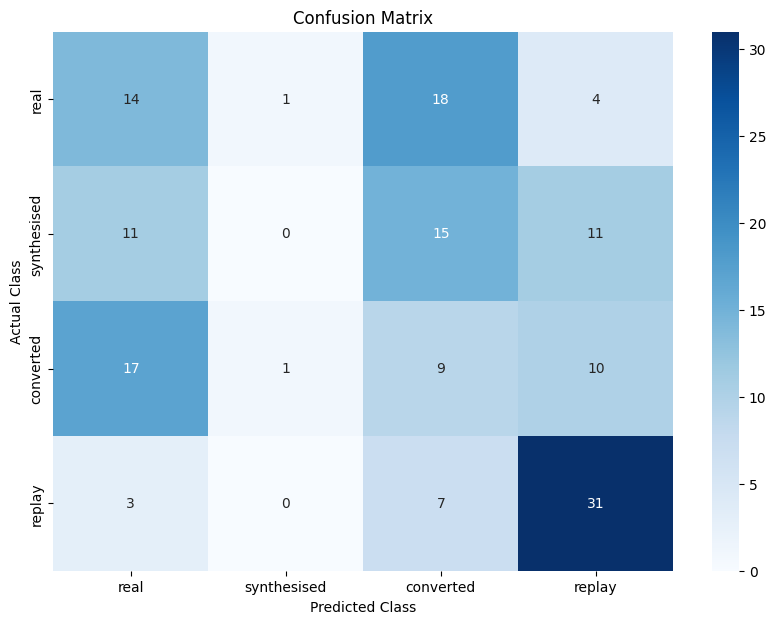

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have X_eval and y_eval datasets for testing
class_labels = ['real', 'synthesised', 'converted','replay']  # Update with your actual class labels
# Perform predictions on the evaluation set
y_eval_pred = model.predict(x_test)
y_eval_pred_classes = np.argmax(y_eval_pred, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_eval_pred_classes)

# Create a heatmap plot
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

# Show the plot
plt.show()


In [ ]:
tr_loss, tr_acc = model.evaluate(x_train, y_train_np)
print("Test loss:", tr_loss)
print("Test accuracy:", tr_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

22/22 [==============================] - 288s 13s/step - loss: 0.8707 - accuracy: 0.5443
Test loss: 0.8706796765327454
Test accuracy: 0.5442857146263123
5/5 [==============================] - 60s 12s/step - loss: 1.9773 - accuracy: 0.3553
Test loss: 1.9772993326187134
Test accuracy: 0.3552631437778473
